In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

Data comes from Kaggle: https://www.kaggle.com/irfanazeem/used-cars-sale-price

In [2]:
sales = pd.read_csv('car_train.csv')

In [3]:
sales.head()

,rownum,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year
0,0,8560.0,2017-06-22,RS,Hatch,Used,Silver,4.0,8.9,Unleaded,2017-06-22,2.0,2,Subaru,Impreza,134944.0,Manual,2009
1,3,17074.0,2017-06-22,2.0i,Hatch,Used,Silver,4.0,6.8,Unleaded,2017-06-22,2.0,3,Subaru,Impreza,33304.0,Automatic,2014
2,4,8526.0,2017-06-22,R,Hatch,Used,Blue,4.0,8.9,Unleaded,2017-06-22,2.0,6,Subaru,Impreza,81668.0,Manual,2007
3,5,10952.0,2017-06-22,R,Hatch,Used,Black,4.0,8.8,Unleaded,2017-06-22,2.0,8,Subaru,Impreza,48051.0,Automatic,2009
4,6,33964.0,2017-06-22,WRX STI,Sedan,Used,Grey,4.0,10.5,Unleaded,2017-06-22,2.5,3,Subaru,Impreza,51516.0,Manual,2011


In [4]:
len(sales)

38506

In [5]:
sales.describe()

,rownum,price,cylinders,economy,litres,location,odometer,year
count,38506.000000,3.850300e+04,36018.000000,34586.000000,36018.000000,38506.000000,3.695600e+04,38506.000000
mean,26760.477796,2.217048e+04,4.014493,8.462942,2.285010,4.004415,9.192221e+04,2011.749078
std,15439.829358,6.546887e+04,0.169636,1.284251,0.257235,2.438988,7.870537e+04,4.719086
min,0.000000,3.300000e+01,4.000000,5.600000,1.600000,1.000000,0.000000e+00,1993.000000
25%,13413.250000,1.204500e+04,4.000000,7.400000,2.000000,2.000000,2.895100e+04,2009.000000
50%,26765.000000,2.106500e+04,4.000000,8.500000,2.400000,3.000000,8.206000e+04,2013.000000
75%,40115.750000,2.959500e+04,4.000000,9.500000,2.500000,6.000000,1.409460e+05,2016.000000
max,53459.000000,1.234576e+07,6.000000,11.600000,3.500000,9.000000,4.265814e+06,2018.000000


In [6]:
sales.describe(include='object')

,acquisition_date,badge,body_type,category,colour,fuel,last_updated,make,model,transmission
count,38506,36933,38504,36018,36545,38478,38506,38506,38506,38499
unique,106,204,8,5,30,2,104,2,3,2
top,2017-09-16,GX,SUV,Used,White,Unleaded,2018-03-09,Subaru,Forester,Automatic
freq,2876,4707,24489,17364,9649,35952,4350,26413,14092,27846


In [7]:
sales.make.unique()

array(['Subaru', 'Toyota'], dtype=object)

In [8]:
sales_forester = sales[sales.model == 'Forester']

In [9]:
sales_forester.describe()

,rownum,price,cylinders,economy,litres,location,odometer,year
count,14092.000000,14091.00000,13179.0,12920.000000,13179.000000,14092.000000,13371.000000,14092.000000
mean,26127.905478,24808.19807,4.0,8.550480,2.393391,4.056202,88108.325705,2012.373261
std,16207.617583,14892.24595,0.0,1.157402,0.204798,2.487061,83646.035244,4.763252
min,1004.000000,41.00000,4.0,5.900000,2.000000,1.000000,0.000000,1997.000000
25%,10899.500000,13007.00000,4.0,8.100000,2.500000,2.000000,2005.500000,2009.000000
50%,26577.500000,24079.00000,4.0,8.100000,2.500000,3.000000,77540.000000,2013.000000
75%,40366.500000,36951.50000,4.0,9.500000,2.500000,6.000000,147691.500000,2017.000000
max,53459.000000,800013.00000,4.0,11.400000,2.500000,9.000000,467736.000000,2018.000000


In [10]:
sales.model.unique()

array(['Impreza', 'Forester', 'RAV4'], dtype=object)

In [11]:
sales_impreza = sales[sales.model == 'Impreza']

In [12]:
sales.litres.unique()

array([2. , 2.5, 1.8, 1.6, nan, 2.2, 2.4, 3.5])

In [13]:
sales.economy.unique()


array([ 8.9,  6.8,  8.8, 10.5,  6.6, 10.4,  7.2, 10.3,  7.1,  9.3,  nan,
       10.6, 10.7, 10. , 10.9, 11.5,  9.2,  9.8,  9.4, 11.6,  9.6, 11.3,
        8.1,  6.3,  6.4,  9.7,  8.7,  8.5,  9.5, 11.1,  5.9, 11. ,  6. ,
       11.4, 11.2,  7. ,  6.5,  6.7,  7.4,  5.6,  5.7,  9.1,  8.4,  8.6,
        7.7])

In [14]:
sales_forester_select = sales_forester.loc[:, ['price', 'economy', 'odometer', 'year', 'body_type', 'category', 'colour']]

In [15]:
sales_forester_select.head()

,price,economy,odometer,year,body_type,category,colour
719,43743.0,8.1,246.0,2017,SUV,Other,Grey
720,35958.0,8.1,124.0,2017,SUV,Other,Grey
721,47567.0,8.1,187.0,2017,SUV,Other,White
722,30905.0,8.1,65889.0,2013,SUV,Used,Silver
723,16049.0,10.5,179053.0,2008,SUV,Used,Silver


In [16]:
sales_forester_select.describe(include='object')

,body_type,category,colour
count,14090,13179,13279
unique,3,5,16
top,SUV,Used,White
freq,13177,5631,3692


In [17]:
sales_forester_select.category.unique()

array(['Other', 'Used', 'Demo', 'Private', 'Other2', nan], dtype=object)

In [18]:
forester = sales_forester_select.loc[:, sales_forester_select.columns != 'category']
forester.head()

,price,economy,odometer,year,body_type,colour
719,43743.0,8.1,246.0,2017,SUV,Grey
720,35958.0,8.1,124.0,2017,SUV,Grey
721,47567.0,8.1,187.0,2017,SUV,White
722,30905.0,8.1,65889.0,2013,SUV,Silver
723,16049.0,10.5,179053.0,2008,SUV,Silver


In [19]:
forester.reset_index(inplace = True, drop=True)

In [20]:
forester.colour.unique()

array(['Grey', 'White', 'Silver', 'Red', 'Blue', nan, 'Black', 'Purple',
       'Gold', 'Green', 'Burgundy', 'Other', 'Beige', 'Brown',
       'Deep Cherry', 'Orange', '/cloth'], dtype=object)

In [21]:
forester.colour.value_counts()

White          3692
Silver         3289
Grey           2241
Blue           1535
Black          1206
Red             773
Green           274
Gold            174
Burgundy         56
Other            17
Purple           11
Beige             4
Brown             3
Deep Cherry       2
Orange            1
/cloth            1
Name: colour, dtype: int64

In [22]:
len(forester[forester.colour.isnull()])

813

In [23]:
len(forester)

14092

In [24]:
forester_nona = forester.dropna()

In [25]:
len(forester_nona)

12163

In [26]:
forester_nona = forester_nona.loc[forester_nona.colour != '/cloth', :]

In [27]:
forester_nona.head()

,price,economy,odometer,year,body_type,colour
0,43743.0,8.1,246.0,2017,SUV,Grey
1,35958.0,8.1,124.0,2017,SUV,Grey
2,47567.0,8.1,187.0,2017,SUV,White
3,30905.0,8.1,65889.0,2013,SUV,Silver
4,16049.0,10.5,179053.0,2008,SUV,Silver


In [28]:
forester_nona.body_type.unique()

array(['SUV'], dtype=object)

In [29]:
sales_forester_select.body_type.value_counts()

SUV      13177
Suv        579
Wagon      334
Name: body_type, dtype: int64

In [30]:
sales_select = sales.loc[:, ['price', 'economy', 'odometer', 'year', 'model', 'colour']]

In [31]:
sales_select_nona = sales_select.dropna()

In [32]:
sales_select_nona.model.value_counts()

Forester    12163
RAV4        10403
Impreza     10241
Name: model, dtype: int64

In [33]:
sales_select_nona.colour.value_counts()

White            8845
Silver           7140
Grey             5379
Blue             3990
Black            3509
Red              2053
Green             351
Gold              337
Graphite          265
Crystal Pearl     236
Ebony             228
Orange            121
Wildfire          116
Ink                74
Brown              48
Burgundy           40
Purple             23
Beige              17
Inferno            12
Sandstone          10
Metal Storm         4
Deep Cherry         3
Envy                2
Hazel               2
Yellow              1
Dune                1
Name: colour, dtype: int64

In [34]:
# Clean colour
normal_colours = ['White', 'Silver', 'Grey', 'Blue', 'Black', 'Red']
sales_select_nona.loc[~sales_select_nona.colour.isin(normal_colours), 'colour' ] = 'Other'
sales_select_nona.colour.value_counts()

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


White     8845
Silver    7140
Grey      5379
Blue      3990
Black     3509
Red       2053
Other     1891
Name: colour, dtype: int64

In [35]:
sales_select_nona.model.value_counts()

Forester    12163
RAV4        10403
Impreza     10241
Name: model, dtype: int64

In [36]:
sales_select_num = sales_select_nona.loc[:, ['price', 'economy', 'odometer', 'year']]

In [37]:
sales_select_num.describe()

,price,economy,odometer,year
count,32807.000000,32807.000000,3.280700e+04,32807.000000
mean,22130.909379,8.523769,8.380138e+04,2012.187247
std,11042.787595,1.270436,7.334518e+04,4.064419
min,828.000000,5.600000,0.000000e+00,2001.000000
25%,13042.000000,7.400000,2.059550e+04,2009.000000
50%,22004.000000,8.500000,7.566600e+04,2013.000000
75%,29505.000000,9.600000,1.296355e+05,2016.000000
max,450610.000000,11.600000,4.265814e+06,2018.000000


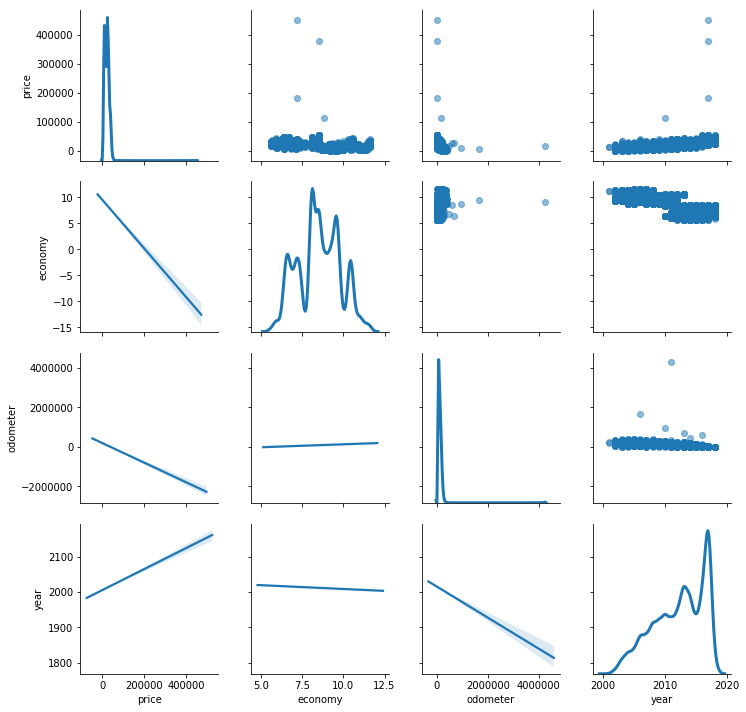

In [38]:
g= sns.PairGrid(sales_select_num, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [39]:
## Remove outliers

sales_select_nona.loc[sales_select_nona.price > 80000,]

,price,economy,odometer,year,model,colour
25145,182501.0,7.2,148.0,2017,Impreza,Blue
25153,450610.0,7.2,545.0,2017,Impreza,Silver
28243,380043.0,8.5,12652.0,2017,RAV4,Black
29189,112984.0,8.8,148292.0,2010,Impreza,Grey


In [40]:
## Brand new Imprezas cost under $20k, and RAV4s cost $25k.
## Potentially decimal point issue but unclear so will remove.

sales_select_nona = sales_select_nona.loc[sales_select_nona.price < 100000,]

In [41]:
sales_select_nona.loc[sales_select_nona.odometer > 400000,]

,price,economy,odometer,year,model,colour
1308,2017.0,8.8,403009.0,2004,Forester,Other
1965,17999.0,6.8,460557.0,2014,Impreza,Silver
6109,8517.0,9.4,1644778.0,2006,Impreza,Silver
12813,17018.0,9.1,4265814.0,2011,RAV4,Red
23915,9556.0,8.8,935468.0,2010,Impreza,Blue
24447,26535.0,8.5,600576.0,2016,RAV4,White
30269,29068.0,6.5,676183.0,2013,RAV4,Grey


In [42]:
## Removing the two with over 1 million miles.

sales_select_nona = sales_select_nona.loc[sales_select_nona.odometer < 1000000,]

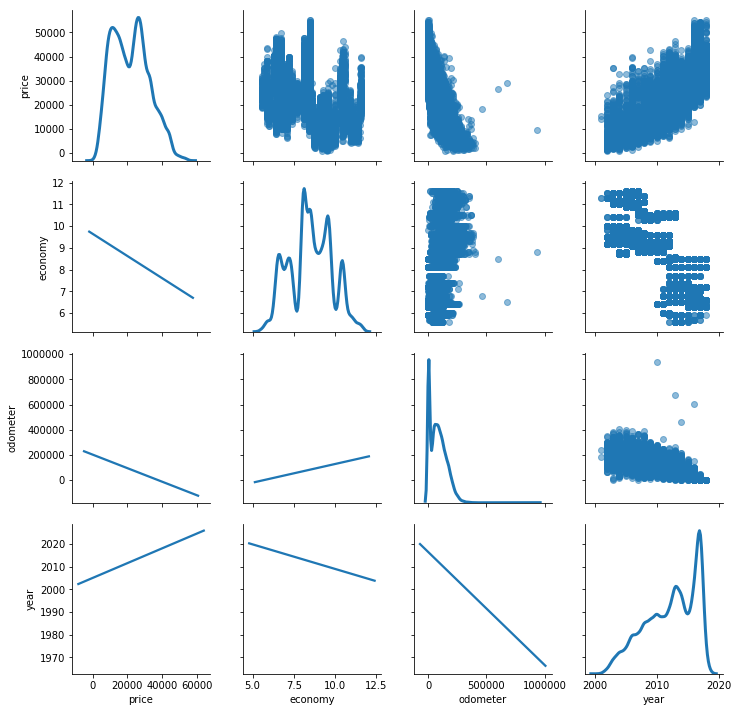

In [43]:
sales_select_num = sales_select_nona.loc[:, ['price', 'economy', 'odometer', 'year']]
g= sns.PairGrid(sales_select_num, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [44]:
ssn = sales_select_nona

In [45]:
ssn.head()

,price,economy,odometer,year,model,colour
0,8560.0,8.9,134944.0,2009,Impreza,Silver
1,17074.0,6.8,33304.0,2014,Impreza,Silver
2,8526.0,8.9,81668.0,2007,Impreza,Blue
3,10952.0,8.8,48051.0,2009,Impreza,Black
4,33964.0,10.5,51516.0,2011,Impreza,Grey


In [46]:
ssn.describe()

,price,economy,odometer,year
count,32801.000000,32801.000000,32801.000000,32801.000000
mean,22099.846682,8.523798,83631.584586,2012.187098
std,10555.538168,1.270496,69081.610607,4.064363
min,828.000000,5.600000,0.000000,2001.000000
25%,13042.000000,7.400000,20635.000000,2009.000000
50%,22004.000000,8.500000,75666.000000,2013.000000
75%,29503.000000,9.600000,129590.000000,2016.000000
max,55077.000000,11.600000,935468.000000,2018.000000


In [47]:
ssn.describe(include='object')

,model,colour
count,32801,32801
unique,3,7
top,Forester,White
freq,12163,8845


In [48]:
ssn_num = ssn.loc[:, ['price', 'economy', 'odometer', 'year']]
ssn_num_long = pd.melt(ssn_num)
ssn_num_long.head()

,variable,value
0,price,8560.0
1,price,17074.0
2,price,8526.0
3,price,10952.0
4,price,33964.0


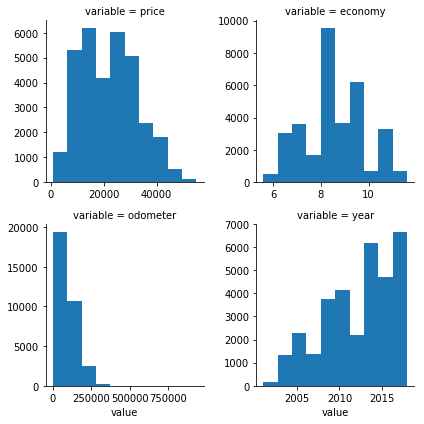

In [49]:
g = sns.FacetGrid(ssn_num_long, col='variable', col_wrap=2,
                 sharex=False,
                 sharey=False)
g.map(plt.hist, 'value')
plt.show()

In [50]:
ssn_cat = ssn.loc[:, ['model', 'colour']]
ssn_model_counts = ssn_cat.model.value_counts().to_frame().reset_index()
ssn_model_counts.head()

,index,model
0,Forester,12163
1,RAV4,10401
2,Impreza,10237


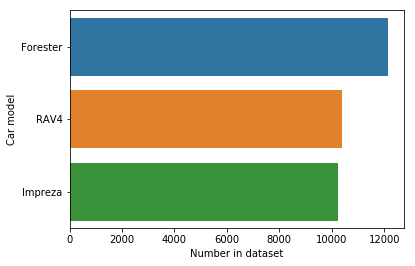

In [51]:
g = sns.barplot(x='model', y='index', data=ssn_model_counts)
g.set_xlabel('Number in dataset')
g.set_ylabel('Car model')
plt.show()

In [52]:
ssn_colour_counts = ssn_cat.colour.value_counts().to_frame().reset_index()
car_colours = ssn_colour_counts['index'].tolist()
car_colours_lower = list(map(lambda x: x.lower(), car_colours))
car_colours_lower

['white', 'silver', 'grey', 'blue', 'black', 'red', 'other']

In [53]:
## Adjust for visibility

adjust_colours = {
    'white': 'whitesmoke',
    'other': 'hotpink'
}

car_colours_palette = [adjust_colours.get(item, item) for item in car_colours_lower]
car_colours_palette

['whitesmoke', 'silver', 'grey', 'blue', 'black', 'red', 'hotpink']

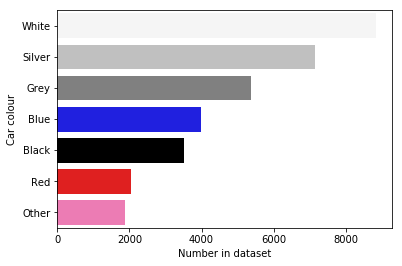

In [54]:
g = sns.barplot(x='colour', y='index', data=ssn_colour_counts,
               palette=car_colours_palette)
g.set_xlabel('Number in dataset')
g.set_ylabel('Car colour')
plt.show()

In [55]:
len(sales_select_nona)

32801

In [56]:
corrmat = ssn_num.corr()
print(corrmat)

             price   economy  odometer      year
price     1.000000 -0.423248 -0.822035  0.845781
economy  -0.423248  1.000000  0.544736 -0.675432
odometer -0.822035  0.544736  1.000000 -0.843160
year      0.845781 -0.675432 -0.843160  1.000000


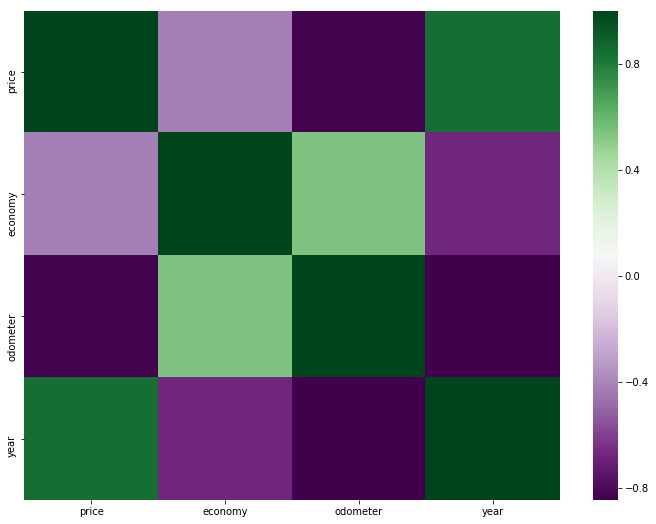

In [57]:
fig = plt.figure(figsize=(12, 9))

sns.heatmap(corrmat, cmap=("PRGn"))
plt.show()

In [58]:
ssn_model_colour = ssn.groupby(['model', 'colour']).count().reset_index()
ssn_model_colour = ssn_model_colour.loc[:, ['model', 'colour', 'price']]
ssn_model_colour.columns = ['model', 'colour', 'count']
ssn_model_colour

,model,colour,count
0,Forester,Black,1115
1,Forester,Blue,1422
2,Forester,Grey,2155
3,Forester,Other,404
4,Forester,Red,713
5,Forester,Silver,2973
6,Forester,White,3381
7,Impreza,Black,1514
8,Impreza,Blue,1882
9,Impreza,Grey,1585


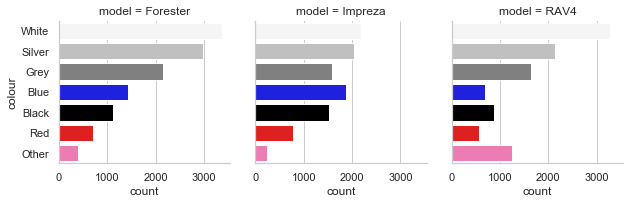

In [59]:
sns.set(style='whitegrid')

g = sns.FacetGrid(ssn_model_colour, col='model')
g.map(sns.barplot,'count', 'colour', order=car_colours,
     palette=car_colours_palette)
plt.show()


In [60]:
ssn_model_colour_year = ssn.groupby(['model', 'colour', 'year']).count().reset_index()
ssn_model_colour_year = ssn_model_colour_year.loc[:, ['model', 'colour', 'year', 'price']]
ssn_model_colour_year.columns = ['model', 'colour', 'year', 'count']
ssn_model_colour_year.head()

,model,colour,year,count
0,Forester,Black,2002,1
1,Forester,Black,2003,7
2,Forester,Black,2004,28
3,Forester,Black,2005,20
4,Forester,Black,2006,38


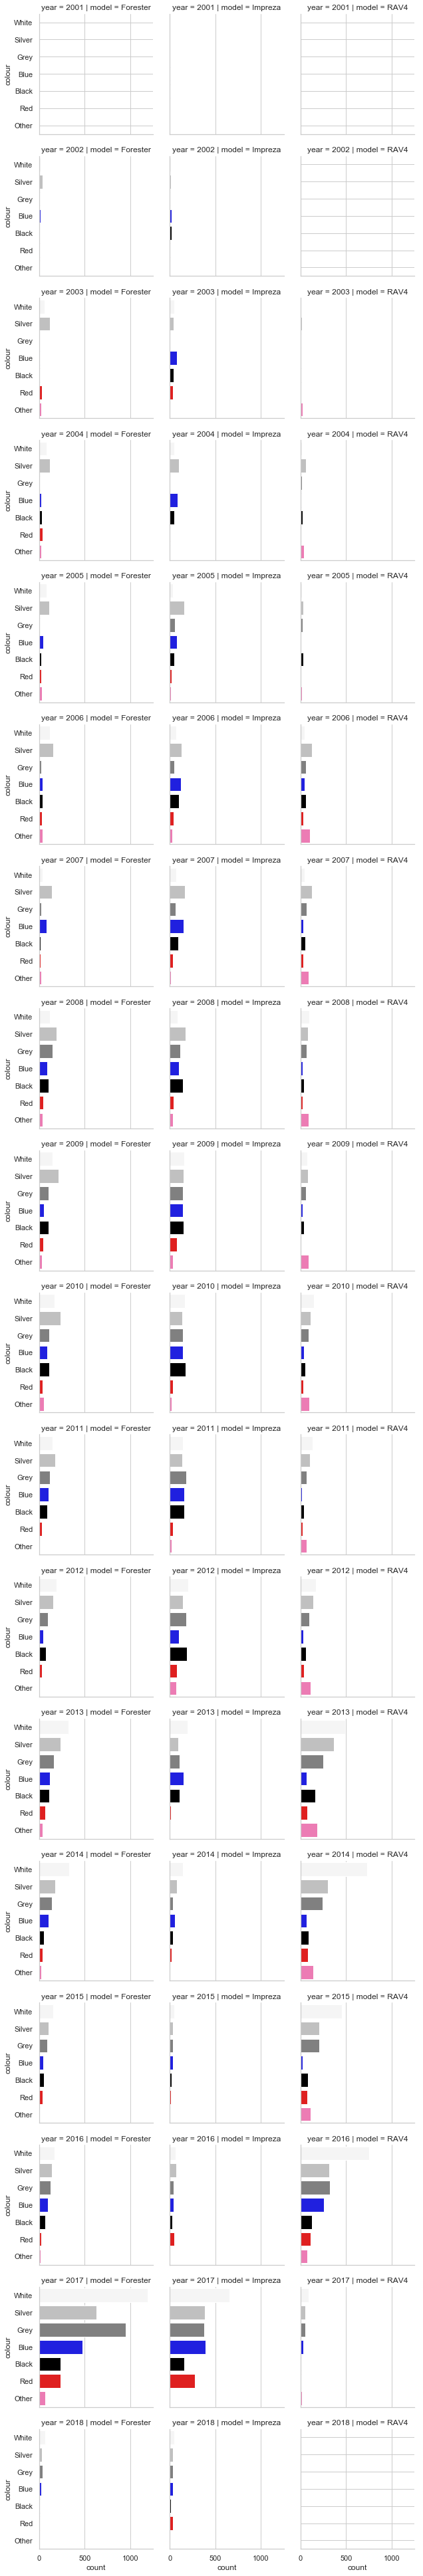

In [61]:
sns.set(style='whitegrid')

g = sns.FacetGrid(ssn_model_colour_year, col='model', row='year')
g.map(sns.barplot,'count', 'colour', order=car_colours,
     palette=car_colours_palette)
plt.show()



In [62]:
ssn_model_year = ssn.groupby(['model', 'year']).count().reset_index()
ssn_model_year = ssn_model_year.loc[:, ['model', 'year', 'price']]
ssn_model_year.columns = ['model', 'year', 'count']
ssn_model_year.tail()

,model,year,count
45,RAV4,2013,1597
46,RAV4,2014,1654
47,RAV4,2015,1166
48,RAV4,2016,1968
49,RAV4,2017,261


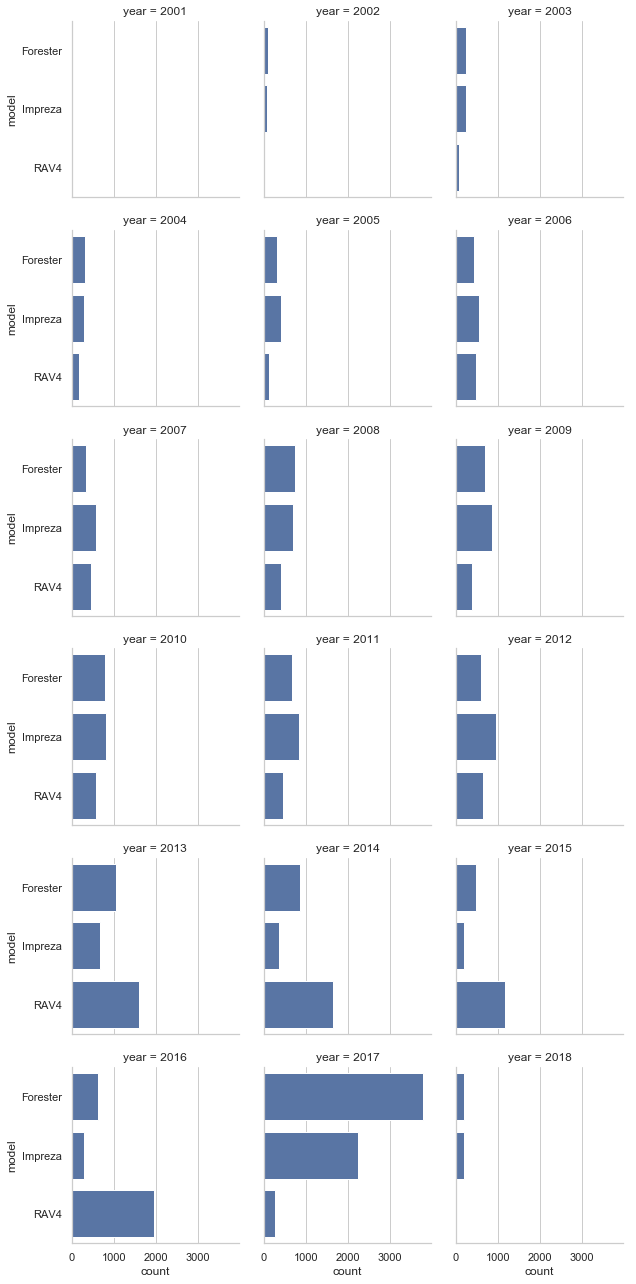

In [63]:
sns.set(style='whitegrid')

g = sns.FacetGrid(ssn_model_year, col='year', col_wrap=3)
g.map(sns.barplot,'count', 'model', order=['Forester', 'Impreza', 'RAV4'])
plt.show()

In [64]:
ssn_for_year = ssn_model_year.loc[ssn_model_year.model == 'Forester',]
ssn_imp_year = ssn_model_year.loc[ssn_model_year.model == 'Impreza',]
ssn_rav_year = ssn_model_year.loc[ssn_model_year.model == 'RAV4',]

In [65]:
ssn_for_year

,model,year,count
0,Forester,2002,89
1,Forester,2003,237
2,Forester,2004,305
3,Forester,2005,316
4,Forester,2006,433
5,Forester,2007,331
6,Forester,2008,732
7,Forester,2009,687
8,Forester,2010,790
9,Forester,2011,664


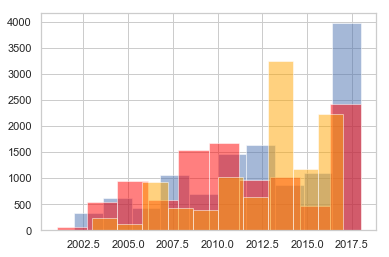

In [66]:
plt.hist(x='year', data=ssn.loc[ssn.model=='Forester',], alpha=.5)
plt.hist(x='year', data=ssn.loc[ssn.model=='Impreza',], alpha=.5, color='red')
plt.hist(x='year', data=ssn.loc[ssn.model=='RAV4', ], alpha=.5, color='orange')
plt.show()

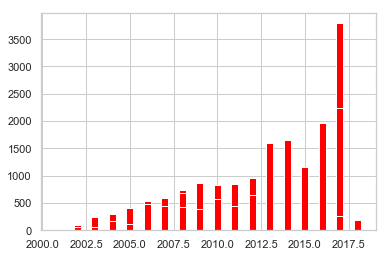

In [67]:
width=0.8
#plt.bar(x='year', height='count', data=ssn_model_year, width=width)
plt.bar(x='year', height='count', data=ssn_model_year, width=width*.5, color='red')
#plt.bar(x='year', height='count', data=ssn_model_year, width=width*.25, color='gray')
plt.show()

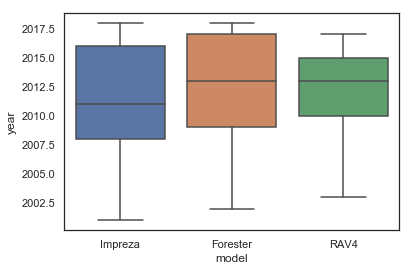

In [68]:
sns.set(style='white')

g = sns.boxplot(x='model', y='year', data=ssn)
plt.show()

In [69]:
ssn.head()

,price,economy,odometer,year,model,colour
0,8560.0,8.9,134944.0,2009,Impreza,Silver
1,17074.0,6.8,33304.0,2014,Impreza,Silver
2,8526.0,8.9,81668.0,2007,Impreza,Blue
3,10952.0,8.8,48051.0,2009,Impreza,Black
4,33964.0,10.5,51516.0,2011,Impreza,Grey


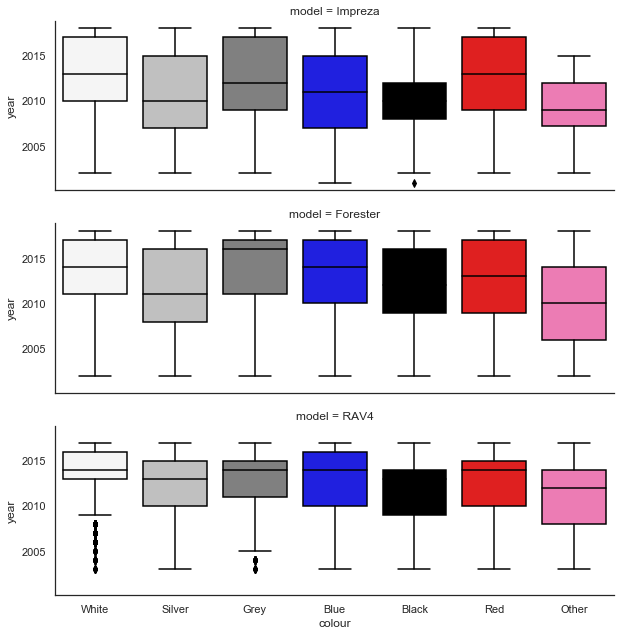

In [70]:

g = sns.FacetGrid(data=ssn, row='model', aspect=3)
g.map(sns.boxplot, 'colour', 'year', order=car_colours,
     palette=car_colours_palette)
plt.show()

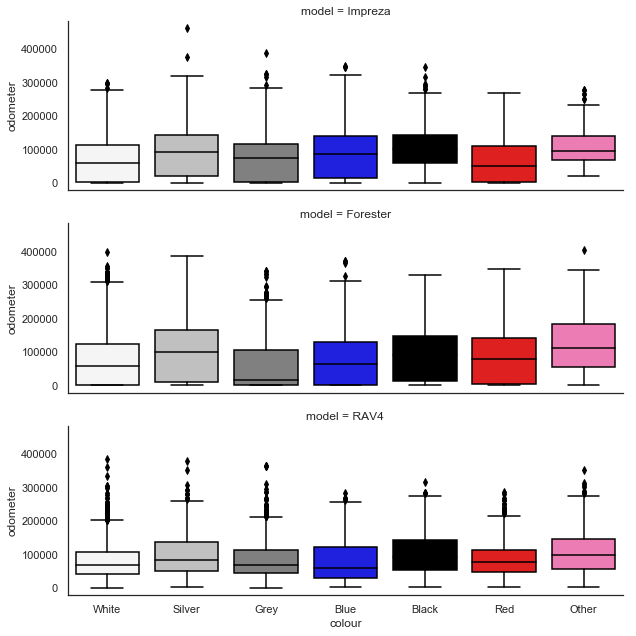

In [71]:
g = sns.FacetGrid(data=ssn.loc[ssn.odometer<500000,], row='model', aspect=3)
g.map(sns.boxplot, 'colour', 'odometer', order=car_colours,
     palette=car_colours_palette)
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


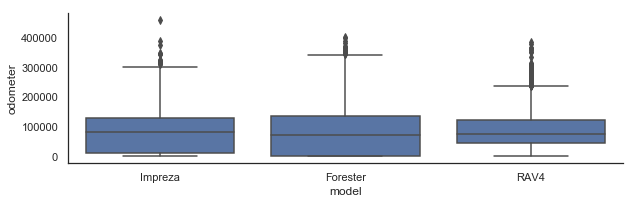

In [72]:
g = sns.FacetGrid(data=ssn.loc[ssn.odometer<500000,], aspect=3)
g.map(sns.boxplot, 'model', 'odometer')
plt.show()

In [73]:
ssn.head()

,price,economy,odometer,year,model,colour
0,8560.0,8.9,134944.0,2009,Impreza,Silver
1,17074.0,6.8,33304.0,2014,Impreza,Silver
2,8526.0,8.9,81668.0,2007,Impreza,Blue
3,10952.0,8.8,48051.0,2009,Impreza,Black
4,33964.0,10.5,51516.0,2011,Impreza,Grey


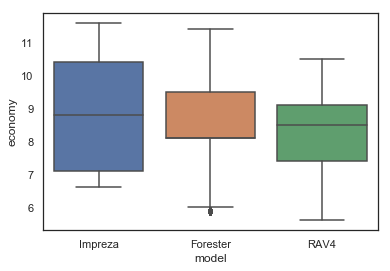

In [74]:
sns.set(style='white')

g = sns.boxplot(x='model', y='economy', data=ssn)
plt.show()

In [75]:
ssn_model_long = pd.melt(ssn.loc[:, ['model', 'economy', 'odometer', 'year']], id_vars='model')
ssn_model_long.head()

,model,variable,value
0,Impreza,economy,8.9
1,Impreza,economy,6.8
2,Impreza,economy,8.9
3,Impreza,economy,8.8
4,Impreza,economy,10.5


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


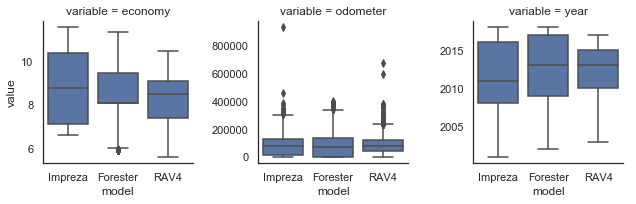

In [76]:
g = sns.FacetGrid(ssn_model_long, col='variable',
                 sharey=False)
g.map(sns.boxplot, 'model', 'value')
plt.show()

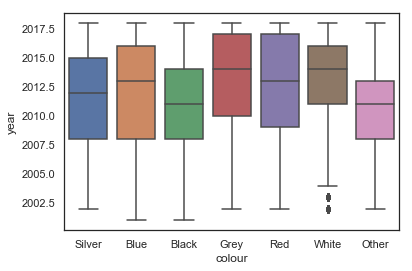

In [77]:
sns.boxplot('colour', 'year', data=ssn)
plt.show()

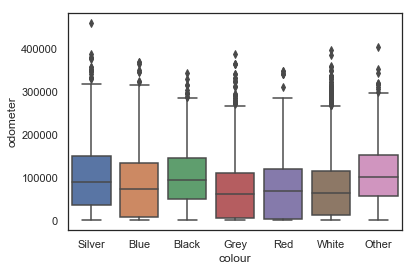

In [78]:
sns.boxplot('colour', 'odometer', data=ssn.loc[ssn.odometer<500000,])

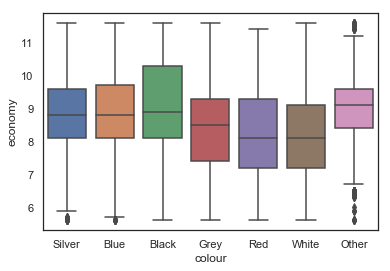

In [79]:
sns.boxplot('colour', 'economy', data=ssn)

In [80]:
ssn_colour_long = pd.melt(ssn.loc[:, ['colour', 'economy', 'odometer', 'year']], id_vars='colour')
ssn_colour_long.head()

,colour,variable,value
0,Silver,economy,8.9
1,Silver,economy,6.8
2,Blue,economy,8.9
3,Black,economy,8.8
4,Grey,economy,10.5


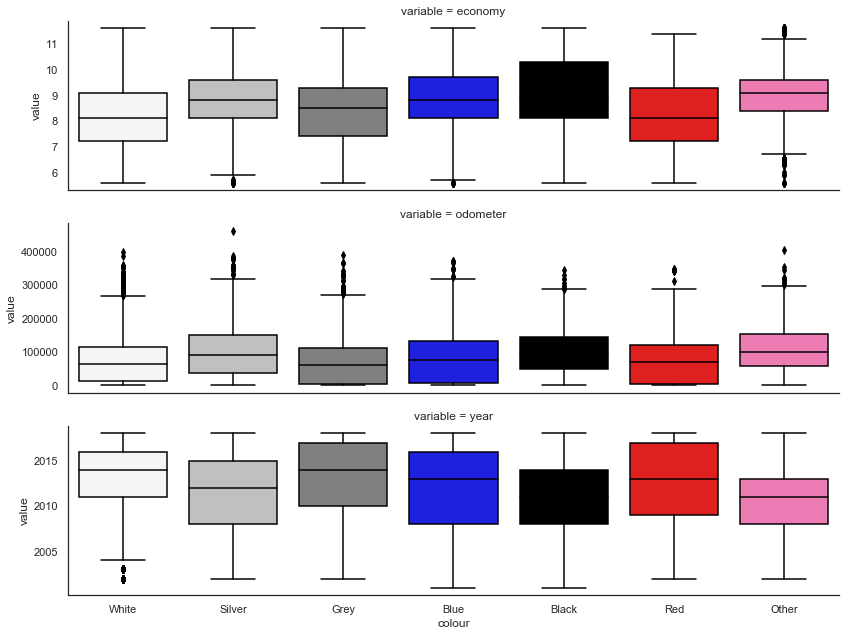

In [81]:
g = sns.FacetGrid(ssn_colour_long.loc[ssn_colour_long.value <500000,], row='variable', aspect=4, sharey=False)
g.map(sns.boxplot, 'colour', 'value', order=car_colours,
     palette=car_colours_palette)
plt.show()

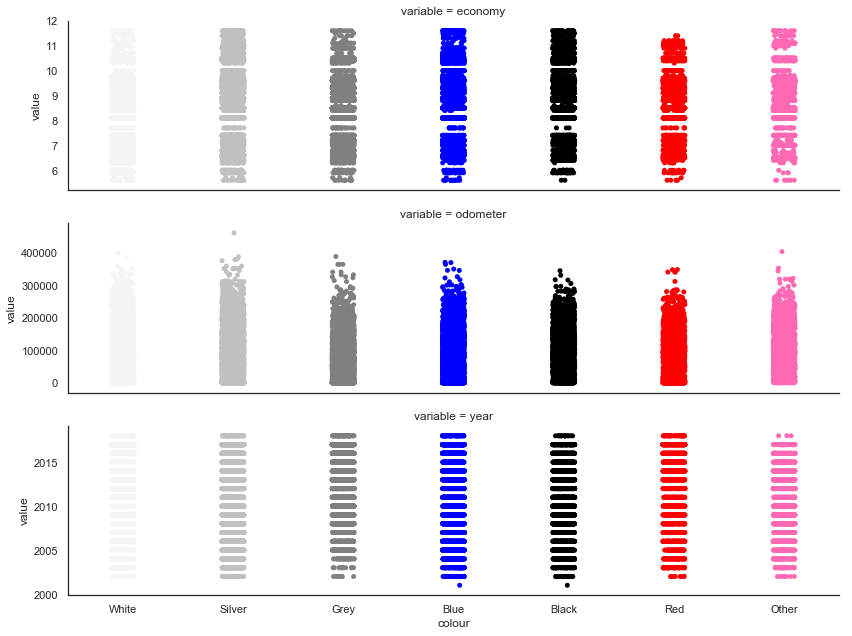

In [82]:
g = sns.FacetGrid(ssn_colour_long.loc[ssn_colour_long.value <500000,], row='variable', aspect=4, sharey=False)
g.map(sns.stripplot, 'colour', 'value', order=car_colours,
     palette=car_colours_palette)
plt.show()

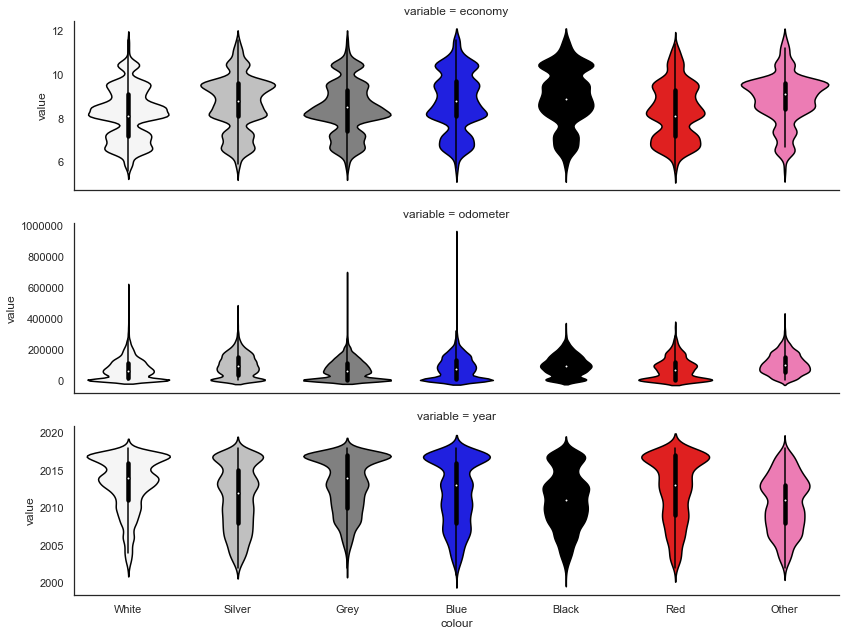

In [83]:
g = sns.FacetGrid(ssn_colour_long, row='variable', aspect=4, sharey=False)
g.map(sns.violinplot, 'colour', 'value', order=car_colours,
     palette=car_colours_palette)
plt.show()

In [84]:
features = pd.get_dummies(ssn['model'])
features.head()

,Forester,Impreza,RAV4
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [85]:
features_2 = pd.get_dummies(ssn['colour'])
features_2.head()

,Black,Blue,Grey,Other,Red,Silver,White
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [86]:
features = pd.concat([features, features_2], axis=1)
features.head()

,Forester,Impreza,RAV4,Black,Blue,Grey,Other,Red,Silver,White
0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0


In [87]:
## Above average mileage
## Average mileage is around 15,000 per year

ssn_mileage = ssn.copy()
ssn_mileage['age'] = 2019 - ssn_mileage['year']
ssn_mileage['exp_mileage'] = ssn_mileage['age'] * 15000
ssn_mileage['mileage_status'] = np.where(ssn_mileage['exp_mileage'] > ssn_mileage['odometer'], 'below average', 'above average')

In [88]:
ssn_mileage.head()


,price,economy,odometer,year,model,colour,age,exp_mileage,mileage_status
0,8560.0,8.9,134944.0,2009,Impreza,Silver,10,150000,below average
1,17074.0,6.8,33304.0,2014,Impreza,Silver,5,75000,below average
2,8526.0,8.9,81668.0,2007,Impreza,Blue,12,180000,below average
3,10952.0,8.8,48051.0,2009,Impreza,Black,10,150000,below average
4,33964.0,10.5,51516.0,2011,Impreza,Grey,8,120000,below average


In [89]:
ssn_mileage.mileage_status.value_counts()

below average    24678
above average     8123
Name: mileage_status, dtype: int64

In [90]:
features['above_av_mileage'] = np.where(ssn_mileage.mileage_status == 'above average', 1, 0)
features.head()

,Forester,Impreza,RAV4,Black,Blue,Grey,Other,Red,Silver,White,above_av_mileage
0,0,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0


In [91]:
## Year, economy and odometer are a bit correlated - use PCA

ssn_yeo = ssn.loc[:, ['year', 'economy', 'odometer']]

ssn_yeo_corrmat = ssn_yeo.corr()
ssn_yeo_corrmat

,year,economy,odometer
year,1.000000,-0.675432,-0.843160
economy,-0.675432,1.000000,0.544736
odometer,-0.843160,0.544736,1.000000


In [92]:
## Create correlation matrix

ssn_yeo_X = StandardScaler().fit_transform(ssn_yeo)
ssn_yeo_Xt = ssn_yeo_X.T
ssn_yeo_Cx = np.cov(ssn_yeo_Xt)
ssn_yeo_Cx

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.00003049, -0.67545236, -0.84318528],
       [-0.67545236,  1.00003049,  0.54475267],
       [-0.84318528,  0.54475267,  1.00003049]])

In [93]:
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(ssn_yeo_X)

sklearn_pca.explained_variance_ratio_

array([0.7943119 , 0.16007666, 0.04561144])

In [94]:
Y_sklearn[:, 0]

array([ 1.07278362, -1.41899595,  0.9251637 , ...,  2.9349623 ,
       -2.20763129, -1.98539024])

In [95]:
ssn_mileage['component'] = Y_sklearn[:, 0]

In [96]:
ssn_plot = ssn_mileage.loc[:, ['component', 'year', 'economy', 'odometer']]
ssn_plot = pd.melt(ssn_plot, id_vars='component')

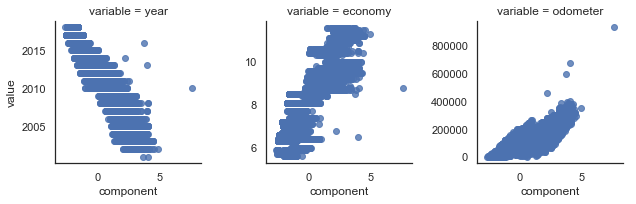

In [97]:
g = sns.FacetGrid(ssn_plot, col='variable', sharey=False)
g.map(sns.regplot, 'component', 'value',
     fit_reg=False)
plt.show()

In [98]:
dir(sklearn_pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'singular_values_',
 'svd_solver',
 'tol',
 'transform',
 'whiten']

In [99]:
sklearn_pca.explained_variance_

array([2.38300836, 0.48024462, 0.13683849])

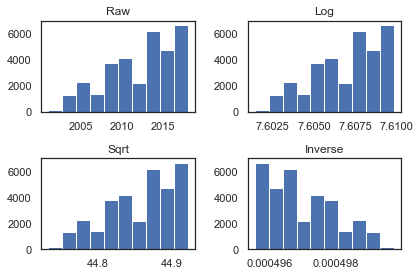

In [100]:
## Year is non normal

fig = plt.figure()

fig.add_subplot(221)
plt.hist(ssn['year'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(ssn['year']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(ssn['year']))
plt.title('Sqrt')

fig.add_subplot(224)
plt.hist(1/(ssn['year']))
plt.title('Inverse')

plt.tight_layout()
plt.show()

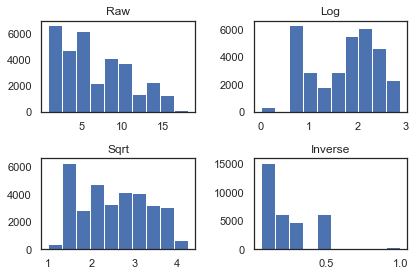

In [101]:
## None were good. Try age.

fig = plt.figure()

fig.add_subplot(221)
plt.hist(ssn_mileage['age'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(ssn_mileage['age']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(ssn_mileage['age']))
plt.title('Sqrt')

fig.add_subplot(224)
plt.hist(1/(ssn_mileage['age']))
plt.title('Inverse')

plt.tight_layout()
plt.show()

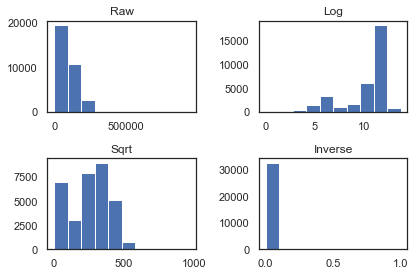

In [102]:
## Odometer is non normal
## Add 1 to remove zero problems

fig = plt.figure()

fig.add_subplot(221)
plt.hist(ssn['odometer']+1)
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(ssn['odometer']+1))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(ssn['odometer']+1))
plt.title('Sqrt')

fig.add_subplot(224)
plt.hist(1/(ssn['odometer']+1))
plt.title('Inverse')

plt.tight_layout()
plt.show()

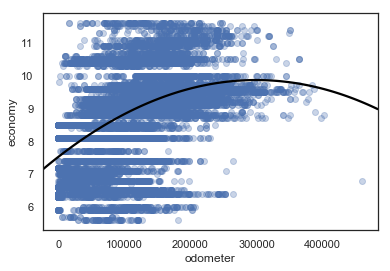

In [103]:
sns.regplot(
    ssn.loc[ssn['odometer'] <500000, 'odometer'],
    ssn.loc[ssn['odometer'] <500000, 'economy'],
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

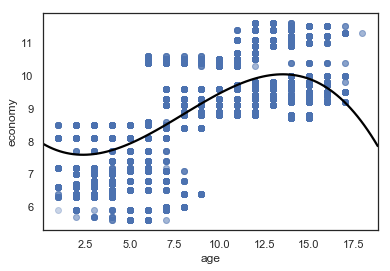

In [104]:
sns.regplot(
    ssn_mileage['age'],
    ssn_mileage['economy'],
    order=3,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

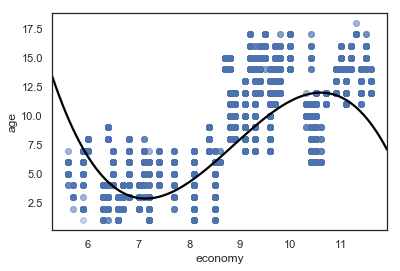

In [105]:
sns.regplot(
    ssn_mileage['economy'],
    ssn_mileage['age'],
    order=3,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()